# World Happiness Report - Data Wrangling With Python

## Datasets Description
The World Happiness Report is a partnership of Gallup, the Oxford Wellbeing Research Centre, the UN Sustainable Development Solutions Network, and the WHR’s Editorial Board. The report is produced under the editorial control of the WHR Editorial Board.

The World Happiness Report reflects a worldwide demand for more attention to happiness and well-being as criteria for government policy. It reviews the state of happiness in the world today and shows how the science of happiness explains personal and national variations in happiness.

## The main steps of this project:
<ul>
    <li><a href="#import">1. Import libraries</a></li>
    <li><a href="#gather">2. Gather Data</a></li>
    <li><a href="#assess">3. Assess data</a></li>
    <li><a href="#clean">4. Clean data</a></li>
    <li><a href="#update">5. Update your data store</a></li>
    <li><a href="#answer">6. Answer the research question</a></li>
</ul>

<a id='import'></a> 
## 1. Import libraries

In [1]:
pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 1.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import requests
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<a id='gather'></a> 
## 2. Gather data

### **2.1.** Problem Statement
This project focuses on analyzing the factors influencing the happiness levels of countries and developing predictive models to estimate the "Ladder Score" based on socio-economic and well-being indicators.

The dataset is derived from the World Happiness Report, which evaluates happiness levels across countries using various metrics, such as social support, healthy life expectancy, and perceptions of corruption.

The primary goal of the analysis is to identify the key variables that most significantly impact the happiness score.



### **2.2.** Gather datasets using two different data gathering methods

#### **Import Manually Downloaded Data**

Type: CSV File
Method: Downloaded files from    https://worldhappiness.report/data/

Dataset variables:
- Ladder score: Happiness score or subjective well-being
- Logged GDP per capita: purchasing power parity(PPP) 
- Social support: having someone to count on in times of trouble
- Healthy life expectancy: Healthy life expectancies at birth are based on the data extracted from WHO 
- Freedom to make life choices: Are you satisfied or dissatisfied with your freedom to choose what you do with your life?
- Generosity: Have you donated money to a charity in the past month?
- Perceptions of corruption: The measure is the national average of the survey responses to two questions in the GWP: “Is    corruption widespread throughout the government or not” and “Is corruption widespread within businesses ornot?” 

In [2]:
WHR_2020 = pd.read_csv('WHR_2020.csv')
WHR_2021 = pd.read_csv('WHR_2021.csv')
WHR_2022 = pd.read_csv('WHR_2022.csv')
WHR_2023 = pd.read_csv('WHR_2023.csv')

#### Import Programmatically Downloaded Data

Type: Excel File

Method: The data was gathered using the "HTTP requests" method from https://worldhappiness.report/data/

Dataset variables: same as above

In [3]:
# Create the directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Import Data Programmatically
url = 'https://happiness-report.s3.amazonaws.com/2024/DataForFigure2.1+with+sub+bars+2024.xls'
response = requests.get(url)

# Save Data
with open('data/DataForFigure2.1+with+sub+bars+2024.xls', "wb") as file:
    file.write(response.content)

# Import Data
df = pd.read_excel('data/DataForFigure2.1+with+sub+bars+2024.xls', sheet_name=0)

In [4]:
# save the DataFrame to a CSV file
df.to_csv('WHR_2024.csv', index=False)

print('The Excel file has been successfully saved as a CSV file: WHR_2024.csv')

The Excel file has been successfully saved as a CSV file: WHR_2024.csv


In [5]:
WHR_2024 = pd.read_csv('WHR_2024.csv')

<a id='Assess'></a>
## 3. Assess data

In this section, I will examine the first few rows of the dataset to identify any quality or tidiness issues.

In [6]:
WHR_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [7]:
WHR_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [8]:
WHR_2022.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [9]:
WHR_2023.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [10]:
WHR_2024.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.7407,7.814808,7.666591,1.844054,1.572367,0.694793,0.859294,0.141674,0.546158,2.082367
1,Denmark,7.5827,7.665297,7.500103,1.907798,1.520361,0.698944,0.822740,0.203579,0.548413,1.880887
2,Iceland,7.5251,7.617527,7.432673,1.880718,1.616525,0.718345,0.818509,0.258344,0.182473,2.050233
3,Sweden,7.3441,7.421563,7.266637,1.878146,1.500826,0.723871,0.838269,0.221455,0.523795,1.657707
4,Israel,7.3411,7.405165,7.277036,1.802934,1.512793,0.739816,0.641463,0.153205,0.192823,2.298026


In [11]:
# Print the shape of each dataframe to know the number of rows and columns for each one

print(WHR_2020.shape)
print(WHR_2021.shape)
print(WHR_2022.shape)
print(WHR_2023.shape)
print(WHR_2024.shape)

(153, 20)
(149, 20)
(147, 12)
(137, 19)
(143, 11)


In [12]:
# Print columns names for each dataframe:

print("2020 Dataframe columns : ")
print(WHR_2020.columns,"\n")
print("2021 Dataframe columns : ")
print(WHR_2021.columns,"\n")
print("2022 Dataframe columns : ")
print(WHR_2022.columns,"\n")
print("2023 Dataframe columns : ")
print(WHR_2023.columns,"\n")
print("2024 Dataframe columns : ")
print(WHR_2024.columns,"\n")

2020 Dataframe columns : 
Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object') 

2021 Dataframe columns : 
Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder sco

# Quality Issues and Tidiness Issues

##### 1) Several key variables are missing in WHR_2022 and WHR_2024, including:
- Logged GDP per capita
- Social support
- Healthy life expectancy
- Freedom to make life choices
- Generosity
- Perceptions of corruption

##### 2) Some columns are not relevant to this project, such as:
- Standard error of ladder score
- upperwhisker
- lowerwhisker
- Ladder score in Dystopia
- Dystopia + residual


##### 3) The column Regional indicator is an additional variablein df_2020 and df_2021 that is not present in other datasets.





<a id='clean'></a>
## 4. Clean data

In [13]:
# Make copies of the datasets to ensure the raw dataframes are not impacted

clean_WHR_2020= WHR_2020.copy()
clean_WHR_2021= WHR_2021.copy()
clean_WHR_2022= WHR_2022.copy()
clean_WHR_2023= WHR_2023.copy()
clean_WHR_2024= WHR_2024.copy()

In [14]:
# Remove unnecessary variables

clean_WHR_2020.drop(['Regional indicator', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
                     'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
                     'Freedom to make life choices', 'Generosity','Perceptions of corruption',
                     'Ladder score in Dystopia', 'Dystopia + residual'], axis = 1, inplace= True)

clean_WHR_2021.drop(["Regional indicator", "Standard error of ladder score", "upperwhisker", "lowerwhisker", 
                     "Ladder score in Dystopia", "Logged GDP per capita","Social support", "Healthy life expectancy",
                     "Freedom to make life choices","Generosity", "Perceptions of corruption", 
                     "Dystopia + residual"], axis = 1, inplace= True)

clean_WHR_2022.drop(['RANK', "Whisker-high", "Whisker-low", "Dystopia (1.83) + residual"], axis = 1, inplace= True)


clean_WHR_2023.drop(["Standard error of ladder score", "upperwhisker", "lowerwhisker", "Logged GDP per capita",
                     "Social support", "Healthy life expectancy", "Freedom to make life choices",
                     "Generosity", "Perceptions of corruption", "Ladder score in Dystopia", 
                     "Dystopia + residual"], axis = 1, inplace= True)

clean_WHR_2024.drop(["upperwhisker", "lowerwhisker", "Dystopia + residual"], axis = 1, inplace= True)

In [15]:
# Rename columns in dataframes

clean_WHR_2020.columns = ['Country', 'Happiness_Score','GDP_per_capita', 'Support', 'Healthy_Life',
                    'Freedom', 'Generosity', 'Corruption_perception' ]

clean_WHR_2021.columns = ['Country', 'Happiness_Score','GDP_per_capita', 'Support', 'Healthy_Life',
                    'Freedom', 'Generosity', 'Corruption_perception' ]

clean_WHR_2022.columns = ['Country', 'Happiness_Score','GDP_per_capita', 'Support', 'Healthy_Life',
                    'Freedom', 'Generosity', 'Corruption_perception' ]

clean_WHR_2023.columns = ['Country', 'Happiness_Score','GDP_per_capita', 'Support', 'Healthy_Life',
                    'Freedom', 'Generosity', 'Corruption_perception' ]

clean_WHR_2024.columns = ['Country', 'Happiness_Score','GDP_per_capita', 'Support', 'Healthy_Life',
                    'Freedom', 'Generosity', 'Corruption_perception' ]

In [16]:
print(clean_WHR_2020.columns,"\n")
print(clean_WHR_2021.columns,"\n")
print(clean_WHR_2023.columns,"\n")
print(clean_WHR_2024.columns,"\n")

Index(['Country', 'Happiness_Score', 'GDP_per_capita', 'Support',
       'Healthy_Life', 'Freedom', 'Generosity', 'Corruption_perception'],
      dtype='object') 

Index(['Country', 'Happiness_Score', 'GDP_per_capita', 'Support',
       'Healthy_Life', 'Freedom', 'Generosity', 'Corruption_perception'],
      dtype='object') 

Index(['Country', 'Happiness_Score', 'GDP_per_capita', 'Support',
       'Healthy_Life', 'Freedom', 'Generosity', 'Corruption_perception'],
      dtype='object') 

Index(['Country', 'Happiness_Score', 'GDP_per_capita', 'Support',
       'Healthy_Life', 'Freedom', 'Generosity', 'Corruption_perception'],
      dtype='object') 



In [17]:
# Add a Year column to all dataframes

clean_WHR_2020["Year"] = "2020"
clean_WHR_2021["Year"] = "2021"
clean_WHR_2022["Year"] = "2022"
clean_WHR_2023["Year"] = "2023"
clean_WHR_2024["Year"] = "2024"

In [18]:
clean_WHR_2020 = clean_WHR_2020.set_index("Country")
clean_WHR_2021 = clean_WHR_2021.set_index("Country")
clean_WHR_2022 = clean_WHR_2022.set_index("Country")
clean_WHR_2023 = clean_WHR_2023.set_index("Country")
clean_WHR_2024 = clean_WHR_2024.set_index("Country")

## Concatenate the dataframes

In [19]:
# Merge all the datasets into the single one

merged_WHR = pd.concat([clean_WHR_2020, clean_WHR_2021, clean_WHR_2022, clean_WHR_2023, clean_WHR_2024])

In [20]:
# Check the dataframe
print(merged_WHR.shape)
merged_WHR.head()

(729, 8)


,Happiness_Score,GDP_per_capita,Support,Healthy_Life,Freedom,Generosity,Corruption_perception,Year
Country,,,,,,,,
Finland,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2020
Denmark,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2020
Switzerland,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2020
Iceland,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2020
Norway,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2020


In [21]:
merged_WHR.tail()

,Happiness_Score,GDP_per_capita,Support,Healthy_Life,Freedom,Generosity,Corruption_perception,Year
Country,,,,,,,,
Congo (Kinshasa),3.2954,0.533670,0.664700,0.261508,0.472705,0.188676,0.072167,2024
Sierra Leone,3.2452,0.654278,0.565977,0.253321,0.469035,0.181365,0.053299,2024
Lesotho,3.1862,0.770807,0.850587,0.000000,0.523188,0.082087,0.084969,2024
Lebanon,2.7065,1.376726,0.576713,0.556247,0.173223,0.067641,0.028772,2024
Afghanistan,1.7210,0.628138,0.000000,0.241763,0.000000,0.090736,0.088471,2024


In [22]:
# Detect the misssing data
missing_data = merged_WHR.isnull()
missing_data.head()

,Happiness_Score,GDP_per_capita,Support,Healthy_Life,Freedom,Generosity,Corruption_perception,Year
Country,,,,,,,,
Finland,False,False,False,False,False,False,False,False
Denmark,False,False,False,False,False,False,False,False
Switzerland,False,False,False,False,False,False,False,False
Iceland,False,False,False,False,False,False,False,False
Norway,False,False,False,False,False,False,False,False


In [23]:
# Count missing values in each column

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Happiness_Score
Happiness_Score
False    728
True       1
Name: count, dtype: int64

GDP_per_capita
GDP_per_capita
False    725
True       4
Name: count, dtype: int64

Support
Support
False    725
True       4
Name: count, dtype: int64

Healthy_Life
Healthy_Life
False    724
True       5
Name: count, dtype: int64

Freedom
Freedom
False    725
True       4
Name: count, dtype: int64

Generosity
Generosity
False    725
True       4
Name: count, dtype: int64

Corruption_perception
Corruption_perception
False    725
True       4
Name: count, dtype: int64

Year
Year
False    729
Name: count, dtype: int64



In [25]:
# Show the Country with NaN value in the 'Happiness_Score' column
merged_WHR[merged_WHR['Happiness_Score'].isna()]

,Happiness_Score,GDP_per_capita,Support,Healthy_Life,Freedom,Generosity,Corruption_perception,Year
Country,,,,,,,,
xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022


In [26]:
# there is no country named XX
merged_WHR = merged_WHR.drop('xx')

In [27]:
# Show the Country with NaN value in the 'GDP_per_capita' column
merged_WHR[merged_WHR['GDP_per_capita'].isna()]

,Happiness_Score,GDP_per_capita,Support,Healthy_Life,Freedom,Generosity,Corruption_perception,Year
Country,,,,,,,,
Bahrain,5.9591,NaN,NaN,NaN,NaN,NaN,NaN,2024
Tajikistan,5.2807,NaN,NaN,NaN,NaN,NaN,NaN,2024
State of Palestine,4.8795,NaN,NaN,NaN,NaN,NaN,NaN,2024


In [28]:
# Show the Country with NaN value in the 'Support' column
merged_WHR[merged_WHR['Support'].isna()]

,Happiness_Score,GDP_per_capita,Support,Healthy_Life,Freedom,Generosity,Corruption_perception,Year
Country,,,,,,,,
Bahrain,5.9591,NaN,NaN,NaN,NaN,NaN,NaN,2024
Tajikistan,5.2807,NaN,NaN,NaN,NaN,NaN,NaN,2024
State of Palestine,4.8795,NaN,NaN,NaN,NaN,NaN,NaN,2024


In [29]:
# Show the Countries with NaN value in the 'Healthy_Life' column
merged_WHR[merged_WHR['Healthy_Life'].isna()]

,Happiness_Score,GDP_per_capita,Support,Healthy_Life,Freedom,Generosity,Corruption_perception,Year
Country,,,,,,,,
State of Palestine,4.9080,1.144,1.309,NaN,0.416,0.065,0.067,2023
Bahrain,5.9591,NaN,NaN,NaN,NaN,NaN,NaN,2024
Tajikistan,5.2807,NaN,NaN,NaN,NaN,NaN,NaN,2024
State of Palestine,4.8795,NaN,NaN,NaN,NaN,NaN,NaN,2024


In [30]:
# Show the Countries with NaN value in the 'Freedom' column
merged_WHR[merged_WHR['Freedom'].isna()]

,Happiness_Score,GDP_per_capita,Support,Healthy_Life,Freedom,Generosity,Corruption_perception,Year
Country,,,,,,,,
Bahrain,5.9591,NaN,NaN,NaN,NaN,NaN,NaN,2024
Tajikistan,5.2807,NaN,NaN,NaN,NaN,NaN,NaN,2024
State of Palestine,4.8795,NaN,NaN,NaN,NaN,NaN,NaN,2024


In [31]:
# Drop the NA values
merged_WHR = merged_WHR.dropna()

In [32]:
# Assert the number of NA values is 0
assert merged_WHR.isnull().sum().sum() == 0

In [33]:
merged_WHR.head()

,Happiness_Score,GDP_per_capita,Support,Healthy_Life,Freedom,Generosity,Corruption_perception,Year
Country,,,,,,,,
Finland,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2020
Denmark,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2020
Switzerland,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2020
Iceland,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2020
Norway,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2020


In [34]:
merged_WHR.isnull().sum()

Happiness_Score          0
GDP_per_capita           0
Support                  0
Healthy_Life             0
Freedom                  0
Generosity               0
Corruption_perception    0
Year                     0
dtype: int64

In [35]:
# Check for duplicated values
df_dups = merged_WHR[merged_WHR.duplicated()]
df_dups

,Happiness_Score,GDP_per_capita,Support,Healthy_Life,Freedom,Generosity,Corruption_perception,Year
Country,,,,,,,,


In [36]:
# List the data types for each column:

print(merged_WHR.dtypes)

Happiness_Score          float64
GDP_per_capita           float64
Support                  float64
Healthy_Life             float64
Freedom                  float64
Generosity               float64
Corruption_perception    float64
Year                      object
dtype: object


<a id='update'></a>
## 5. Update the data store

In [37]:
merged_WHR.to_csv('merged_WHR.csv', index=False)

<a id='answer'></a>
## 6. Answer the research question

### **6.1:** what are the key factors that have the greatest impact on the happiness score.

To begin, we'll define the 'Happiness Score' variable as the dependent variable and the other variables as predictors (excluding the 'Year' variable).

To understand the linear relationship between an individual variable and the 'Happiness Score,' we can use the regplot function. This plots both the scatterplot and the fitted regression line for the data.

(0.0, 8.14805000219345)

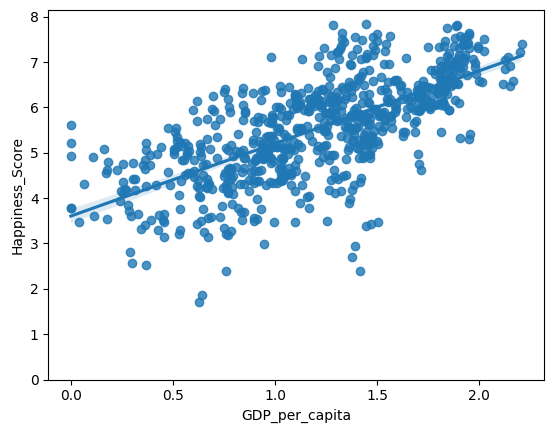

In [38]:
# 'GDP_per_capita' as potential predictor variable of 'Happiness_Score':

sns.regplot(x="GDP_per_capita", y="Happiness_Score", data=merged_WHR)
plt.ylim(0,)

In [39]:
# the correlation between 'GDP_per_capita' and 'Happiness_Score':

merged_WHR[["GDP_per_capita", "Happiness_Score"]].corr()

,GDP_per_capita,Happiness_Score
GDP_per_capita,1.000000,0.680217
Happiness_Score,0.680217,1.000000


(0.0, 8.14805000219345)

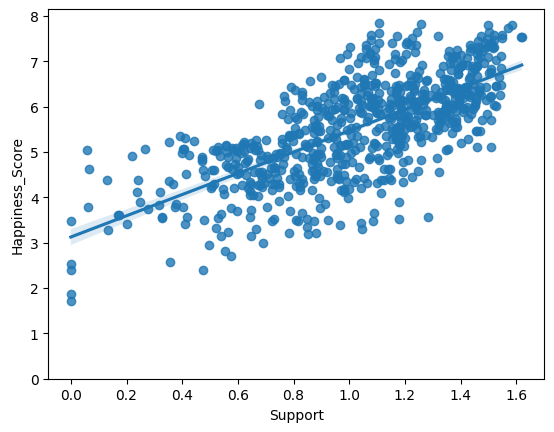

In [40]:
# 'Support' as potential predictor variable of 'Happiness_Score':

sns.regplot(x="Support", y="Happiness_Score", data=merged_WHR)
plt.ylim(0,)

In [41]:
# the correlation between 'Family' and 'Happiness_Score':

merged_WHR[["Support", "Happiness_Score"]].corr()

,Support,Happiness_Score
Support,1.000000,0.698936
Happiness_Score,0.698936,1.000000


(0.0, 8.14805000219345)

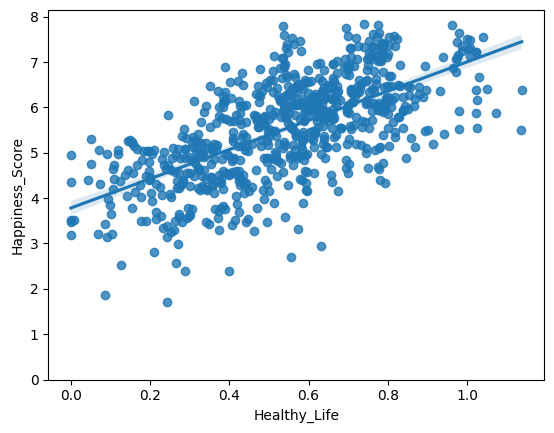

In [42]:
# 'Healthy_Life' as potential predictor variable of 'Happiness_Score':

sns.regplot(x="Healthy_Life", y="Happiness_Score", data=merged_WHR)
plt.ylim(0,)

(0.0, 8.14805000219345)

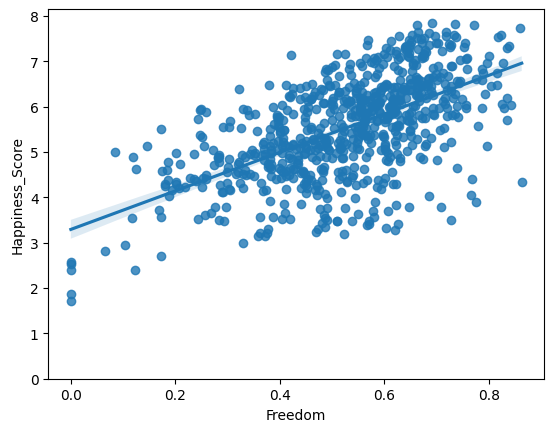

In [44]:
# 'Freedom' as potential predictor variable of 'Happiness_Score':

sns.regplot(x="Freedom", y="Happiness_Score", data=merged_WHR)
plt.ylim(0,)

(0.0, 8.14805000219345)

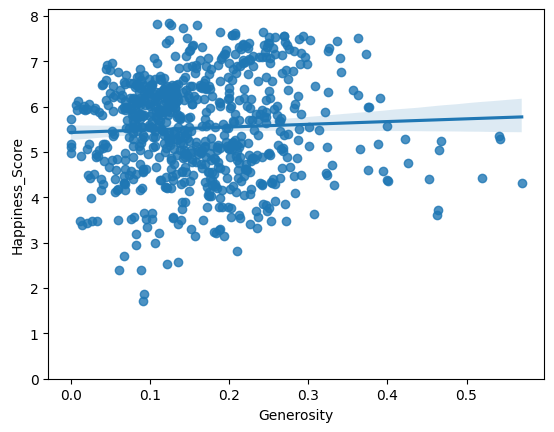

In [46]:
# 'Generosity' as potential predictor variable of 'Happiness_Score':

sns.regplot(x="Generosity", y="Happiness_Score", data=merged_WHR)
plt.ylim(0,)

(0.0, 8.14805000219345)

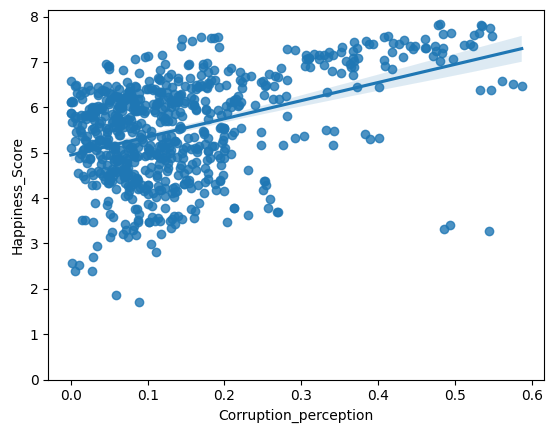

In [48]:
# 'Corruption_perception' as potential predictor variable of 'Happiness_Score':

sns.regplot(x="Corruption_perception", y="Happiness_Score", data=merged_WHR)
plt.ylim(0,)

In [54]:
correlation_matrix = merged_WHR.corr()
correlation_matrix

,Happiness_Score,GDP_per_capita,Support,Healthy_Life,Freedom,Generosity,Corruption_perception,Year
Happiness_Score,1.000000,0.680217,0.698936,0.646275,0.593649,0.048059,0.435472,0.016604
GDP_per_capita,0.680217,1.000000,0.608881,0.477325,0.476653,-0.222475,0.374034,0.437874
Support,0.698936,0.608881,1.000000,0.535483,0.456194,-0.023588,0.209779,0.125510
Healthy_Life,0.646275,0.477325,0.535483,1.000000,0.270301,-0.024515,0.303927,-0.316960
Freedom,0.593649,0.476653,0.456194,0.270301,1.000000,0.127176,0.385182,0.322859
Generosity,0.048059,-0.222475,-0.023588,-0.024515,0.127176,1.000000,0.146865,-0.185000
Corruption_perception,0.435472,0.374034,0.209779,0.303927,0.385182,0.146865,1.000000,0.068557
Year,0.016604,0.437874,0.125510,-0.316960,0.322859,-0.185000,0.068557,1.000000


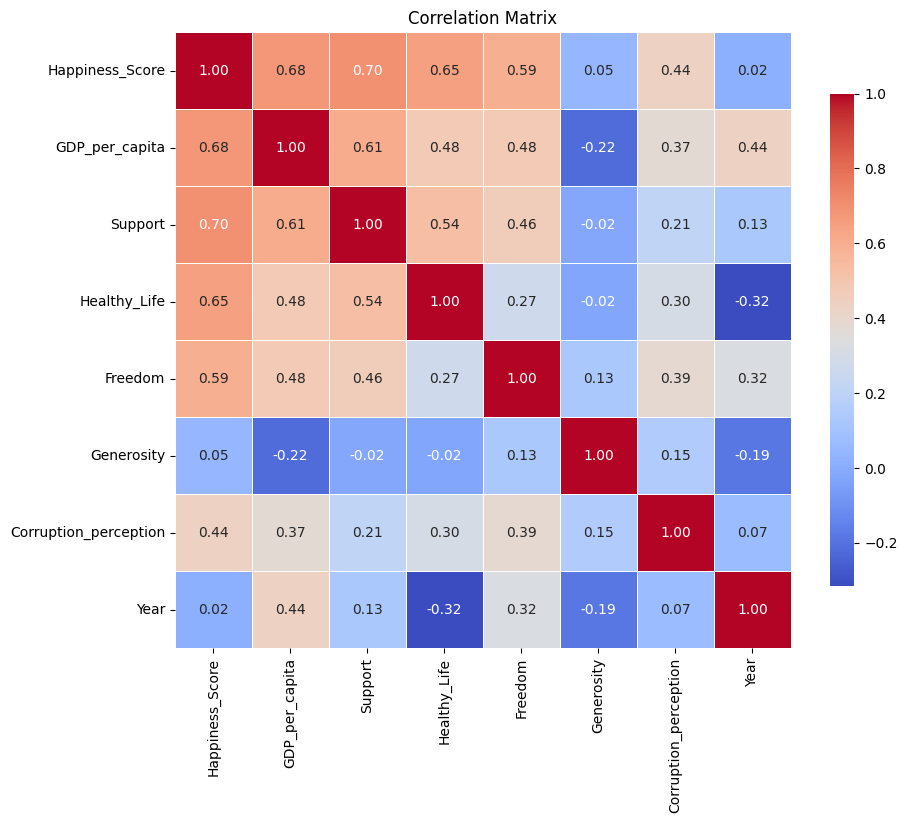

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

### **6.2:** Conclusion
1. Variable 'Support'  (having someone to count on in times of trouble) may be a pretty good predictor of 'Happiness_Score', between these variables there is a direct positive correlation, it's approximetaly 0.69. 
2. Variable 'GDP_per_capita' also can be a good predictor of 'Happiness_Score', correlation is 0.68.
3. Variable 'Healthy_Life' also can be a good predictor of 'Happiness_Score', correlation is 0.64.
4. Other predictor variables have weak linear relationship with the dependent variable 'Happiness_Score'.

# reflection
If I had more time to complete the project, I would include the variable 'Region' and investigate its relationship with happiness. Additionally, I would rank the countries and regions based on their happiness levels to identify patterns or trends across different areas. This analysis could provide deeper insights into regional influences on happiness.